<h1>Actividad Optativa</h1>

<h3>Problema 1</h3>

Construir un modelo en SAGE para el siguiente
helicóptero, sabiendo que las dimensiones de la pieza
base (1 cubo) son de 7.8 x 7.8 x 9.6 unidades, y que las
piezas más planas tienen altura 1/3 de la usual (esto es,
3.2 unidades). NO SE CONSIDERAN los cilindros que
permiten encajar las piezas entre sí; todas las piezas
constan de 6 caras planas, para nuestros propósitos.


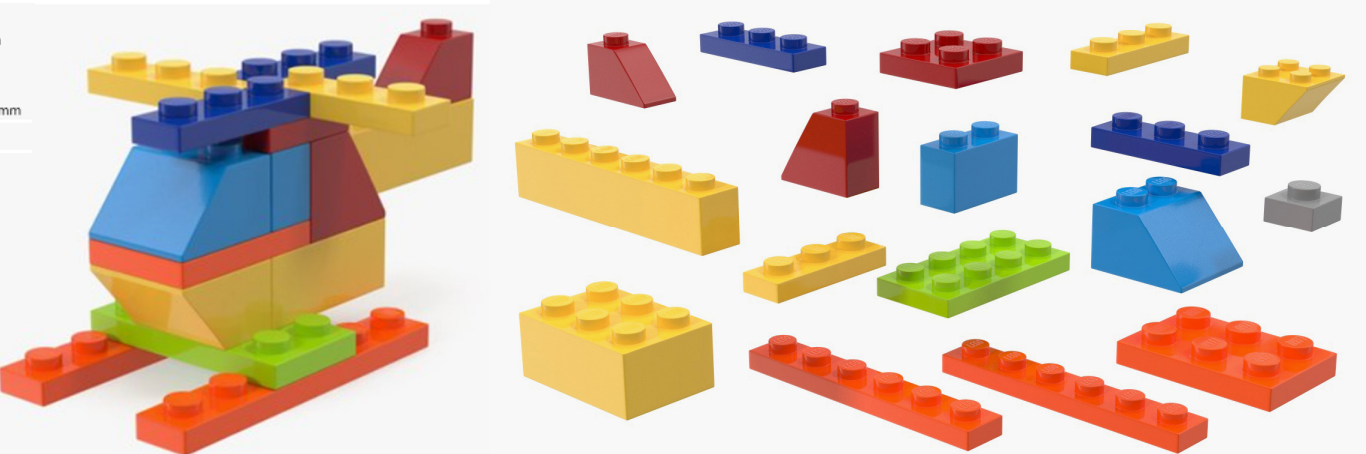

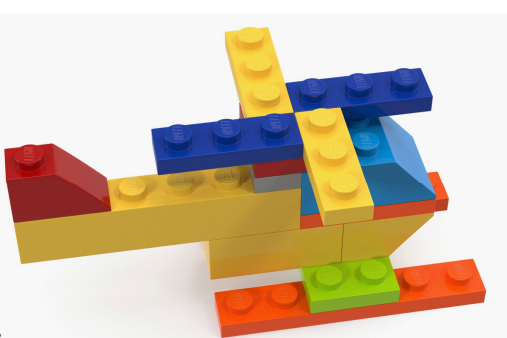

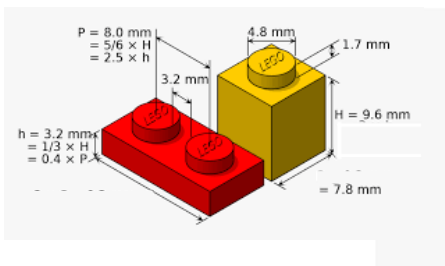

Variables globales y cargar las funciones que se necesitarán

In [1]:
#funciones de practicas
reset()
load('funciones.sage')

#transladar de medida de bloque en medida de bloque, solo tener cuidado con los tercios en z
def traslacion_pro(lista):
    return traslacion(matrix([lista[0]*width,lista[1]*length,lista[2]*height,1]).transpose())

#clase Poligono
from dataclasses import dataclass
@dataclass 
class Poligono:
    vertices: matrix
    caras: matrix
#------------------------------------------------------------------       
#medidas de la base      
width = 7.8;
length = 7.8;
height = 9.6;
tercio = 1/3;

<h2>Cubo base</h2>

In [2]:
def get_vertices_cubo_base():
        coordenadas = [
        [0,0,0],[1,0,0],[1,1,0],[0,1,0],[0,0,1],[1,0,1],[1,1,1],[0,1,1]
        ]
        puntos_cubo_1 = matrix(coordenada+[1] for coordenada in coordenadas).transpose() 
        return escalado([width,length,height])*puntos_cubo_1
    
def get_caras_cubo_base():
        caras = [
        [3, 2, 1, 0], [5, 4, 0, 1], [6, 7, 4, 5], [2, 3, 7, 6], [6, 5, 1, 2], [6, 5, 1, 2], [0, 4, 7, 3]
        ]   
        return matrix(caras)

cubo_base = Poligono(vertices = get_vertices_cubo_base(),caras = get_caras_cubo_base())
dibujar_mallado_poligonal(cubo_base.vertices,cubo_base.caras,color="#333")


Graphics3d Object

<h2>Piezas estandar</h2>

<script>
// Crea una variable para el objeto helper
const helper = [{ nombre: 'Ayuda 1', descripcion: 'Esta es la descripción de la Ayuda 1.' }, { nombre: 'Ayuda 2', descripcion: 'Esta es la descripción de la Ayuda 2.' }, { nombre: 'Ayuda 3', descripcion: 'Esta es la descripción de la Ayuda 3.' }];

// Obtén una referencia al elemento div donde se mostrarán las descripciones
const descripcionDiv = document.getElementById('descripcion');

// Recorre el objeto helper y crea un div para cada elemento
helper.forEach((ayuda) => {
  // Crea un elemento div para la ayuda
  const ayudaDiv = document.createElement('div');
  // Añade el nombre de la ayuda como contenido de texto del div
  ayudaDiv.textContent = ayuda.nombre;
  // Añade un controlador de eventos clic al div
  ayudaDiv.addEventListener('click', () => {
    // Si la descripción ya está visible, ocúltala
    if (descripcionDiv.textContent === ayuda.descripcion) {
      descripcionDiv.textContent = '';
    } else {
      // Si la descripción no está visible, muéstrala
      descripcionDiv.textContent = ayuda.descripcion;
    }
  });
  // Añade el div de ayuda al documento
  document.body.appendChild(ayudaDiv);
});
</script>

In [3]:
tres_x_dos= escalado([3,2,1])*cubo_base.vertices
dibujar_mallado_poligonal(tres_x_dos,cubo_base.caras,color="#dd0")

Graphics3d Object

In [4]:
seis_x_uno= escalado([6,1,1])*cubo_base.vertices
dibujar_mallado_poligonal(seis_x_uno,cubo_base.caras,color="#dd0")

Graphics3d Object

In [5]:
dos_x_uno= escalado([2,1,1])*cubo_base.vertices
dibujar_mallado_poligonal(dos_x_uno,cubo_base.caras,color="#00d")

Graphics3d Object

<h2>Piezas diagonales</h2>

In [6]:
#reescala solo las coordenadas x de los puntos P5 y P6
P0_4 = dos_x_uno[:,0:5]
P5 = escalado([0.5,1,1])*dos_x_uno.column(5)
P6 = escalado([0.5,1,1])*dos_x_uno.column(6)
P7_8 = dos_x_uno[:,7:9]

diagonal_dos_x_dos = escalado([1,2,1])*P0_4.augment(P5).augment(P6).augment(P7_8)
dibujar_mallado_poligonal(diagonal_dos_x_dos,cubo_base.caras,color="#00d")

Graphics3d Object

In [7]:
diagonal_dos_x_uno = escalado([1,0.5,1])*diagonal_dos_x_dos
dibujar_mallado_poligonal(diagonal_dos_x_uno,cubo_base.caras,color="#d00")

Graphics3d Object

In [8]:
#Esta es un tercio mas alta de lo normal H=1+tercio
diagonal_dos_x_uno_y_tercio = escalado([1,0.5,1+tercio])*diagonal_dos_x_dos
dibujar_mallado_poligonal(diagonal_dos_x_uno_y_tercio,cubo_base.caras,color="#d00")

Graphics3d Object

In [9]:
N=matrix([0,0,1,0]).transpose() #primero simetria en z=0
D=matrix([0,0,height,0]).transpose() #para volver a los valores positivos de z
diagonal_inv_dos_x_dos = traslacion(D)*simetria(N)*diagonal_dos_x_dos
dibujar_mallado_poligonal(diagonal_inv_dos_x_dos,cubo_base.caras,color="#dd0")

Graphics3d Object

<h3>Ahora las piezas de 1/3</h3>

In [10]:
tercio_uno_x_uno= escalado([1,1,tercio])*cubo_base.vertices
dibujar_mallado_poligonal(tercio_uno_x_uno,cubo_base.caras,color="#ddd")

Graphics3d Object

In [11]:
tercio_dos_x_dos= escalado([2,2,1])*tercio_uno_x_uno
dibujar_mallado_poligonal(tercio_dos_x_dos,cubo_base.caras,color="#f00")

Graphics3d Object

In [12]:
tercio_tres_x_uno= escalado([3,1,1])*tercio_uno_x_uno
dibujar_mallado_poligonal(tercio_tres_x_uno,cubo_base.caras,color="#00d")

Graphics3d Object

In [13]:
tercio_seis_x_uno= escalado([6,1,1])*tercio_uno_x_uno
dibujar_mallado_poligonal(tercio_seis_x_uno,cubo_base.caras,color="#fa0")

Graphics3d Object

In [14]:
tercio_tres_x_dos= escalado([3,2,1])*tercio_uno_x_uno
dibujar_mallado_poligonal(tercio_tres_x_dos,cubo_base.caras,color="#fa0")

Graphics3d Object

In [15]:
tercio_cuatro_x_dos= escalado([4,2,1])*tercio_uno_x_uno
dibujar_mallado_poligonal(tercio_cuatro_x_dos,cubo_base.caras,color="#0f0")

Graphics3d Object

In [16]:
b=100
r = dibujar_mallado_poligonal_delimitado(matrix([[0,0,0,1],[b,0,0,1],[b,b,0,1],[0,b,0,1]]).transpose(),matrix([0,1,2,3]),color="#6f6")
#es un helicoptero tiene que estar volando :P
r += dibujar_mallado_poligonal_delimitado(traslacion_pro([5,2,5,1])*tercio_seis_x_uno,cubo_base.caras,color="#fa0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([5,5,5,1])*tercio_seis_x_uno,cubo_base.caras,color="#fa0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([7,6,5+1*tercio,1])*rotacion('z',-pi/2)*tercio_cuatro_x_dos,cubo_base.caras,color="#0f0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([5,3,5+2*tercio,1])*tres_x_dos,cubo_base.caras,color="#dd0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([8,3,5+2*tercio,1])*diagonal_inv_dos_x_dos,cubo_base.caras,color="#dd0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([7,3,6+2*tercio,1])*tercio_tres_x_dos,cubo_base.caras,color="#fa0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([7,5,6+2*tercio,1])*rotacion('z',pi)*diagonal_dos_x_uno_y_tercio,cubo_base.caras,color="#f00")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([8,3,7,1])*rotacion('z',pi/2)*dos_x_uno,cubo_base.caras,color="#aaf")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([8,3,7,1])*diagonal_dos_x_dos,cubo_base.caras,color="#aaf")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([1,3,7-tercio,1])*seis_x_uno,cubo_base.caras,color="#ff0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([6,3,8-tercio,1])*tercio_uno_x_uno,cubo_base.caras,color="#ddd")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([1,3,8-tercio,1])*diagonal_dos_x_uno,cubo_base.caras,color="#f00")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([6,3,8,1])*tercio_dos_x_dos,cubo_base.caras,color="#f00")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([4,3,8+tercio,1])*tercio_tres_x_uno,cubo_base.caras,color="#00f")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([7,4,8+tercio,1])*tercio_tres_x_uno,cubo_base.caras,color="#00f")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([7,4,8+tercio,1])*rotacion('z',pi/2)*tercio_tres_x_uno,cubo_base.caras,color="#ff0")
r+= dibujar_mallado_poligonal_delimitado(traslacion_pro([7,4,8+tercio,1])*rotacion('z',-pi/2)*tercio_tres_x_uno,cubo_base.caras,color="#ff0")

r

Graphics3d Object